# Module 4: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand mean intervals and Prediction Intervals through read data applications and visualizations.
2. Observe how CIs and PIs change on different data sets.
3. Observe and analyze interval curvature.
4. Apply understanding of causation to experimental and observational studies.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1: Interpreting Intervals

For this problem, we're going to practice creating and interpreting Confidence (Mean) Intervals and Prediction Intervals. To do so, we're going to use data in U.S. State Wine Consumption (millions of liters) and Population (millions).

#### 1. (a) Initial Inspections

Load in the data and create a scatterplot with `population` on the x-axis and `totWine` on the y-axis. For fun, set the color of the point to be `#CFB87C`.

In [2]:
# Load the data
wine.data = read.csv("wine_state_2013.csv")
head(wine.data)
# Your Code Here

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874
2,Alaska,10.9,0.736879,8.031981
3,Arizona,9.7,6.624617,64.258785
4,Arkansas,4.2,2.958663,12.426385
5,California,14.0,38.335203,536.692842
6,Colorado,8.7,5.267603,45.828146


#### 1. (b) Confidence Intervals

Fit a linear regression with `totWine` as the response and `pop` as the predictor. Add the regression line to your scatterplot. For fun, set its color to gold with `col=#CFB87C`. Add the $90\%$ Confidence Interval for the regression line to the plot.

Then choose a single point-value population and display the upper and lower values for the Confidence Interval at that point. In words, explain what this interval means for that data point.

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
30,New Hampshire,19.6,1.322687,25.92467


fit       lwr       upr 
 2.727071 -9.223861 14.678003

`geom_smooth()` using formula 'y ~ x'



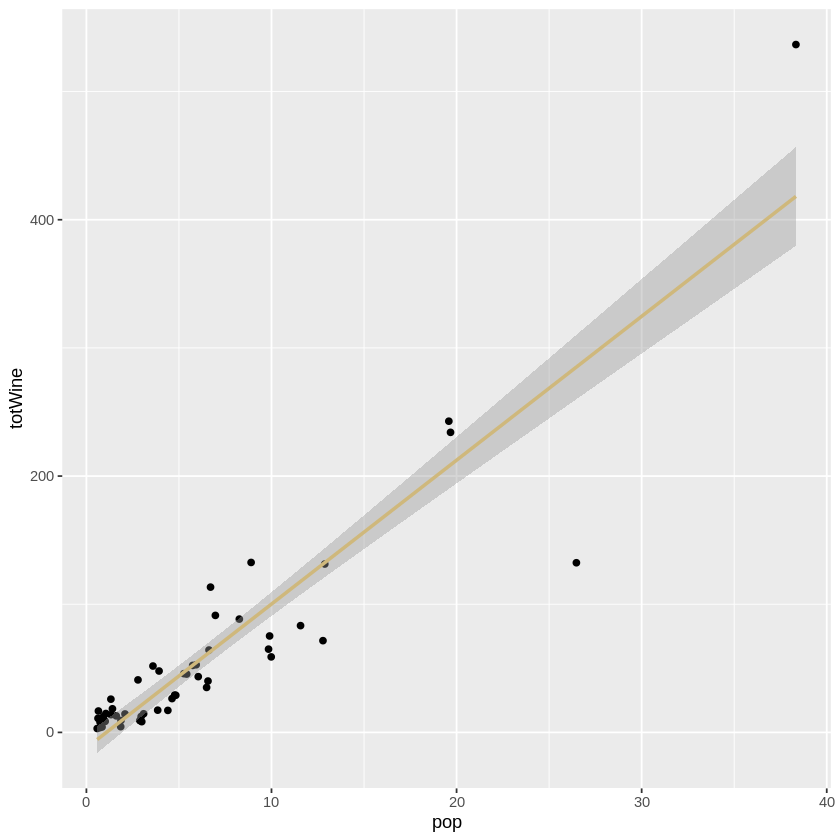

In [11]:
# Your Code Here
wine.lm.mod = lm(totWine~pop,data=wine.data)
wine.lm.predict = predict(wine.lm.mod,data=wine.data,interval='confidence')
wine.data[30,]
wine.lm.predict[30,]
ggplot(wine.data,aes(x=pop,y=totWine)) +
    geom_point() + 
    stat_smooth(aes(x=pop,y=totWine),data=wine.data,method=lm,colour='#CFB87C',level=0.90)

For data point with index 30 (state New Hampshire, pop=1.322687), the point-value prediction for response is 2.727 with confidence interval [-9.224,14.6780]. This confidence interval indicates in 90% of the statistical experiments repeated, the true mean response given pop=1.322687 will be within this range.

#### 1. (c) Prediction Intervals

Using the same `pop` point-value as in **1.b**, plot the prediction interval end points. In words, explain what this interval means for that data point.

In [12]:
# Your Code Here
wine.lm.predict = predict(wine.lm.mod,data=wine.data,interval='prediction')
wine.data[30,]
wine.lm.predict[30,]

Warning message in predict.lm(wine.lm.mod, data = wine.data, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
30,New Hampshire,19.6,1.322687,25.92467


fit        lwr        upr 
  2.727071 -68.211221  73.665363

For data point with index 30 (state New Hampshire, pop=1.322687), the point-value prediction for response is 2.727 with prediction interval [-68.2112207598592,73.6653630831616]. This prediction interval indicates in 90% of the statistical experiments repeated, the true response given pop=1.322687 will be within this range.

#### 1. (d) Some "Consequences" of Linear Regression

As you've probably gathered by now, there is a lot of math that goes into fitting linear models. It's important that you're exposed to these underlying systems and build an intuition for how certain processes work. However, some of the math can be a bit too... tedious for us to make you go through on your own. Below are a list of "consequences" of linear regression, things that are mathematically true because of the assumptions and formulations of the linear model (let $\widehat\varepsilon_i$ be the residuals of the regression model):

1. $\sum \widehat\varepsilon_i = 0$ : The sum of residuals is 0.
2. $\sum \widehat\varepsilon_i^2$ is as small as it can be.
3. $\sum x_i \widehat\varepsilon_i = 0$
4. $\sum \hat{y}_i \widehat\varepsilon_i = 0$ : The Residuals are orthogonal to the fitted values.
5. The Regression Line always goes through $(\bar{x}, \bar{y})$.

Check that your regression model confirms the "consequences" $1,3,4$ and $5$. For consequence $2$, give a logical reason on why this formulation makes sense.

**Note: even if your data agrees with these claims, that does not prove them as fact. For best practice, try to prove these facts yourself!**

In [30]:
# Your Code Here
sum(residuals(wine.lm.mod))
sum(residuals(wine.lm.mod)^2)
sum(wine.data$pop*residuals(wine.lm.mod))
sum(wine.data$fitted*residuals(wine.lm.mod))
mean(wine.data$totWine)-predict(wine.lm.mod,data.frame(pop=mean(wine.data$pop)))

[1] -2.006728e-14

[1] 59325.93

[1] -1.116329e-12

[1] 0

1 
-7.105427e-15

1, -2.00672811700997e-14

2, This quantity is as small as it can be as the least square estimate chooses the coefficients to minimise the sum of square of residuals

3, -1.11632925126059e-12

4, 0

5, -7.105427357601e-15

# Problem 2: Explanation

<img src="xkcd_correlation.png" style="width:600px;"/>

Image Source: https://xkcd.com/552/

Did our wine drinking data come from an experiment or an observational study? Do you think we can infer causation between population and the amount of wine drank from these data?

An observational study. We cannot infer causation between the two variables.

# Problem 3: Even More Intervals!

We're almost done! There is just a few more details about Confidence Intervals and Perdiction Intervals which we want to go over. How does changing the data affect the confidence interval? That's a hard question to answer with a single dataset, so let's simulate a bunch of different datasets and see what they intervals they produce.

#### 3. (a) Visualize the data

The code cell below generates 20 data points from two different normal distributions. Finish the code by fitting a linear model to the data and plotting the results with ggplot, with Confidence Intervals for the mean and Prediction Intervals included. 

Experiment with different means and variances. Does changing these values affect the CI or PI?

In [31]:
gen_data <- function(mu1, mu2, var1, var2){
    # Function to generate 20 data points from 2 different normal distributions.
    x.1 = rnorm(10, mu1, 2)
    x.2 = rnorm(10, mu2, 2)
    y.1 = 2 + 2*x.1 + rnorm(10, 0, var1)
    y.2 = 2 + 2*x.2 + rnorm(10, 0, var2)

    df = data.frame(x=c(x.1, x.2), y=c(y.1, y.2))
    return(df)
}

set.seed(0)
head(gen_data(-8, 8, 10, 10))

,x,y
,<dbl>,<dbl>
1,-5.474091,-11.1908617
2,-8.652467,-11.5309770
3,-5.340401,-7.3474393
4,-5.455141,-0.8683876
5,-7.170717,-12.9125020
6,-11.079900,-15.1237204


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



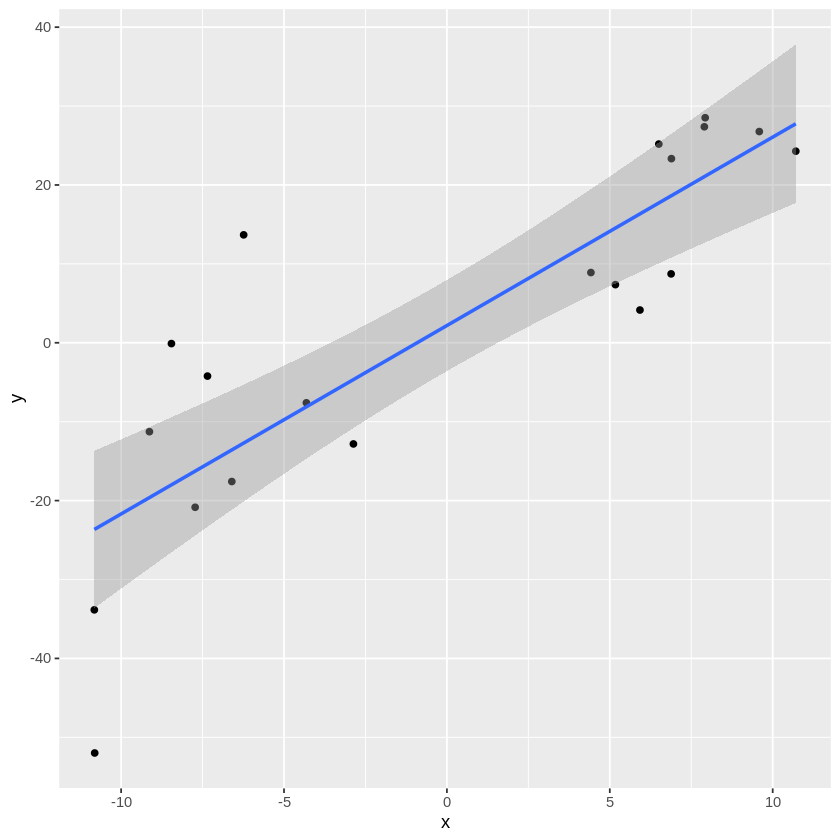

`geom_smooth()` using formula 'y ~ x'



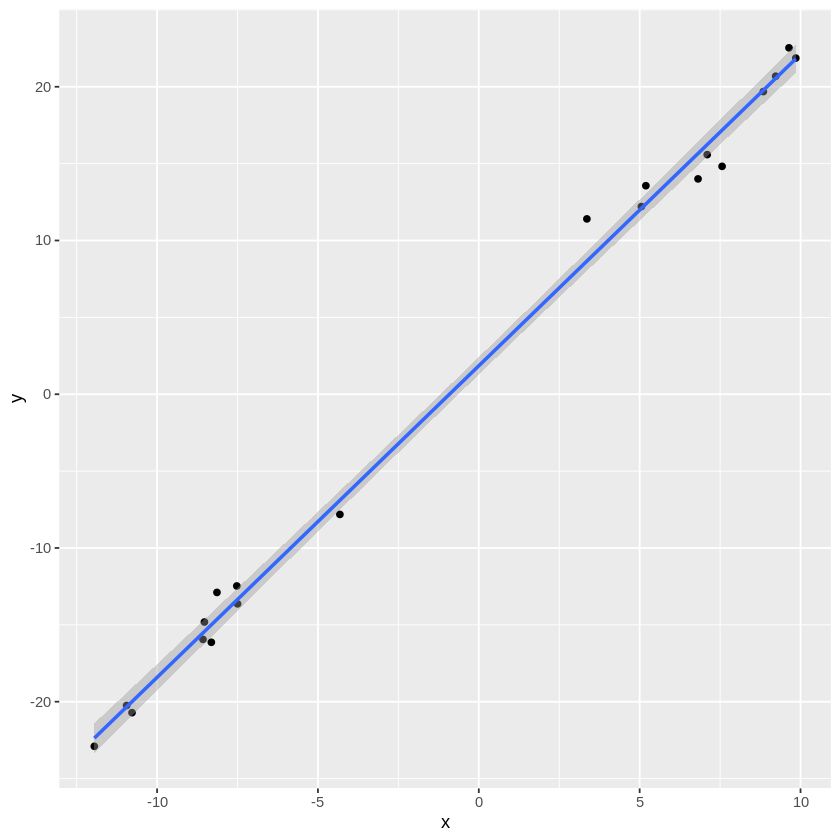

`geom_smooth()` using formula 'y ~ x'



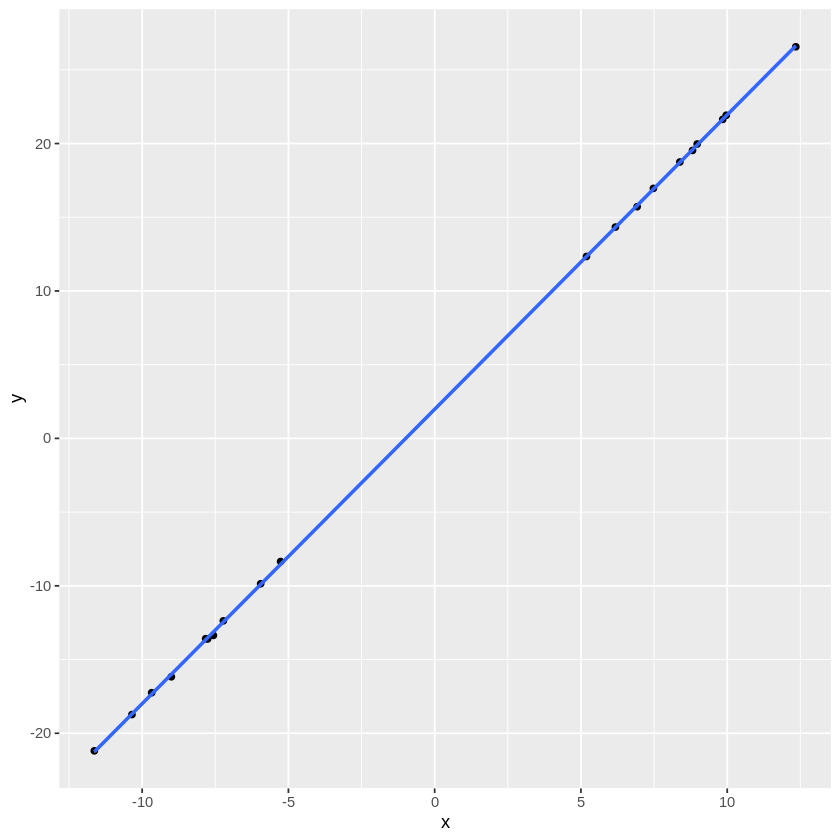

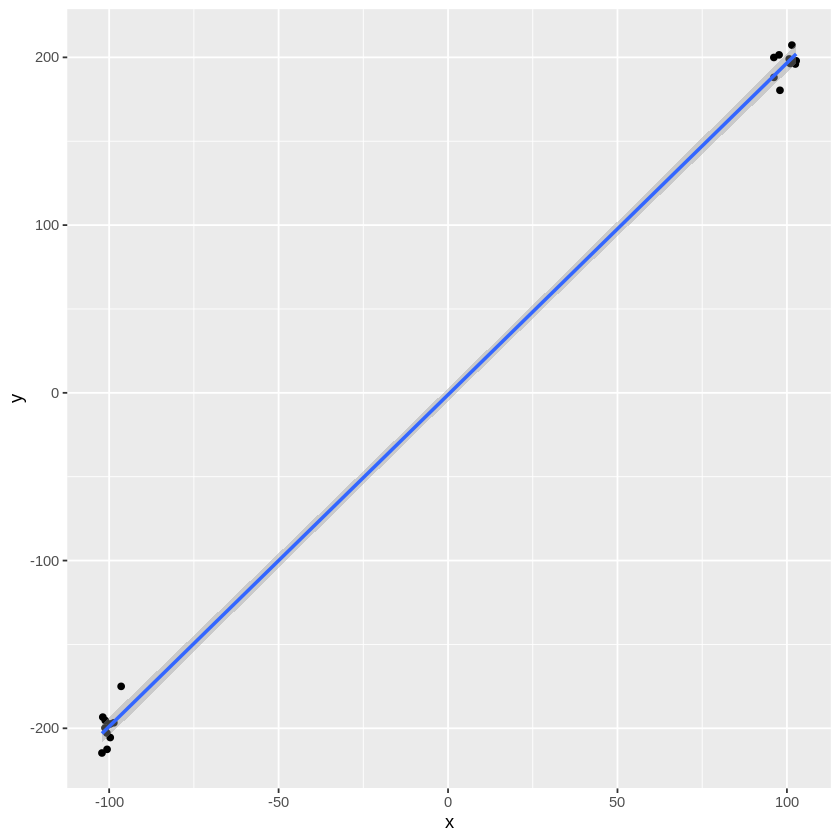

In [42]:
# Your Code Here
library(dplyr)
data1 = gen_data(-8, 8, 10, 10)
ggplot(data1,aes(x=x,y=y)) +
    geom_point() +
    stat_smooth(method=lm)

data2 = gen_data(-8, 8, 1, 1)
ggplot(data2,aes(x=x,y=y)) +
    geom_point() +
    stat_smooth(method=lm)

data3 = gen_data(-8, 8, 0.1, 0.1)
ggplot(data3,aes(x=x,y=y)) +
    geom_point() +
    stat_smooth(method=lm)

data4 = gen_data(-100, 100, 10, 10)
ggplot(data4,aes(x=x,y=y)) +
    geom_point() +
    stat_smooth(method=lm)

Yes, changing means or variances change the CI and PI.

#### 3. (b) The Smallest Interval

Recall that the Confidence (Mean) Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

where $\hat{y}_h$ is the fitted response for predictor value $x_h$, $t_{\alpha/2,n-2}$ is the t-value with $n-2$ degrees of freedom and $MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_h - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)$ is the standard error of the fit.

From the above equation, what value of $x_k$ would result in the CI with the shortest width? Does this match up with the simulated data? Can you give an intuitive reason for why this occurs?

This occurs when all x_k equals the mean x \bar{x}. This matches up with the simulation data. When input variance is small in simulated data, the CI decreases.

#### 3. (c) Interviewing the Intervals

Recall that the Prediction Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \Big( 1 + \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

Does the "width" of the Prediction Interval change at different population values? Explain why or why not.

Yes. With larger sample size, the width will decrease due to more accurate estimation of coefficients.

## Problem 4: Causality

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

1. The fundamental problem for causal inference is that, for any individual unit, we can observe only one outcome, i.e. we cannot observe the couterfactual outcome.

2. Although the couterfactual outcome could not be observed directly, we can make assumption on each statistical unit to approximate the couterfactual outcome on them. For example, we can measure the treatment effect on a statistical unit at different times if the effect of time on the outcome is known to be negligible.

3. One view of causation is deterministic: A causes B means that whenever A occurs, B occurs. An alternative view is that causation is probabilistic: the assertion means that given A, the probability of B is greater than some criterion, such as the probability of B given not-A.

## Problem 5: Causal inference and ethics

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the quantitative ventures to compute 'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (300-500 words) summarizing this debate. Some important items to consider:**

1. How does the "fundamental problem of causal inference" play out in these discussions?

A person can only belong to one race and the counterfactual is this person being in other races. But the latter case can never be observed directly.

2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"?

Conditioning on post-treatment variables.
